In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [3]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Save the input and target variables
print(diabetes_dataset.keys())
data = diabetes_dataset['data']
target = diabetes_dataset['target']

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [5]:
# Normalise the target data (this will make clearer training curves)
target = (target - target.mean())/target.std()


In [6]:
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [7]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.1)


In [ ]:
plot_train = np.random.choice(1000, 16, replace = False)
plt.figure(figsize = (12,12))
for u, v in enumerate(plot_train):
  plt.subplot(4, 4, u+1)
  plt.imshow(xtrain[v,:,:,:])
  plt.text(15, -1.5, s = ytrain[v,0], fontsize = 14)
  plt.axis('off')

#### Train a feedforward neural network model

In [8]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential([
    Dense(128, activation = 'relu', input_shape = (xtrain.shape[1],)),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(1)
  ])
  return model
model = get_model()

In [9]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [10]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [11]:
# Train the model, with some of the data reserved for validation
history = model.fit(xtrain, ytrain, epochs=100,
                    validation_split = 0.15, batch_size = 64)


Epoch 1/100
6/6 [==============================] - 1s 45ms/step - loss: 0.9622 - mae: 0.8355 - val_loss: 0.9640 - val_mae: 0.8439
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.8793 - mae: 0.7975 - val_loss: 0.7790 - val_mae: 0.7509
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6930 - mae: 0.6978 - val_loss: 0.5120 - val_mae: 0.5965
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6111 - mae: 0.6538 - val_loss: 0.4865 - val_mae: 0.5723
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5466 - mae: 0.5943 - val_loss: 0.4977 - val_mae: 0.5714
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4998 - mae: 0.5890 - val_loss: 0.5532 - val_mae: 0.5920
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5100 - mae: 0.5637 - val_loss: 0.5261 - val_mae: 0.5705
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4853 - mae: 0.5680 - v

In [12]:
# Evaluate the model on the test set
model.evaluate(xtest, ytest)


2/2 [==============================] - 0s 6ms/step - loss: 0.8819 - mae: 0.7063


[0.881927490234375, 0.7062744498252869]

#### Plot the learning curves

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

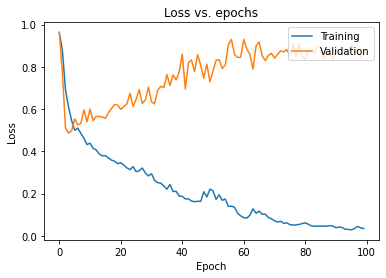

In [14]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [16]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer= regularizers.l2(wd), input_shape=(xtrain.shape[1],)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer= regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer= regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer= regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer= regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer= regularizers.l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [17]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-4, 0.3)


In [18]:
# Compile the model
model.compile(optimizer= 'adam', loss = 'mse', metrics = ['mae'])


In [19]:
# Train the model, with some of the data reserved for validation
history = model.fit(xtrain, ytrain, epochs = 100,
                    validation_split = 0.15, batch_size = 64)


Epoch 1/100
6/6 [==============================] - 1s 48ms/step - loss: 1.0356 - mae: 0.8402 - val_loss: 1.0592 - val_mae: 0.8585
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 1.0203 - mae: 0.8353 - val_loss: 1.0156 - val_mae: 0.8401
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.9804 - mae: 0.8179 - val_loss: 0.9196 - val_mae: 0.7977
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.8873 - mae: 0.7775 - val_loss: 0.7226 - val_mae: 0.7018
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7643 - mae: 0.7121 - val_loss: 0.6276 - val_mae: 0.6439
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6618 - mae: 0.6378 - val_loss: 0.6139 - val_mae: 0.6116
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6534 - mae: 0.6260 - val_loss: 0.5958 - val_mae: 0.5965
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6662 - mae: 0.6360

In [20]:
# Evaluate the model on the test set
model.evaluate(xtest, ytest)


2/2 [==============================] - 0s 6ms/step - loss: 0.7948 - mae: 0.6766


[0.7947869896888733, 0.6766257286071777]

#### Plot the learning curves

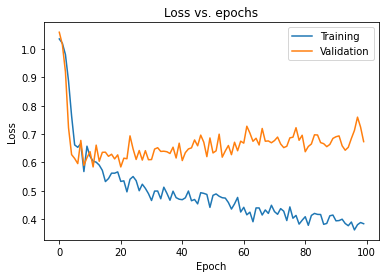

In [21]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [22]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_train_begin(self, logs = None):
    print('Start training...')
  
  def on_epoch_begin(self, epoch, logs = None):
    print(f'Start epoch {epoch}')
  
  def on_train_batch_begin(self, batch, logs = None):
    print(f'training: starting batch {batch}')

  def on_train_batch_end(self, batch, logs= 'None'):
    print(f'training: end batch {batch}')

  def on_epoch_end(self, epoch, logs = None):
    print(f'finished epoch {epoch}')

  def on_train_end(self, logs = None):
    print(f'finished training')

In [27]:
class TestingCallback(Callback):
  def on_test_begin(self, logs = None):
    print('Start testing...')
  
  def on_test_batch_begin(self, batch, logs = None):
    print(f'testing: starting batch {batch}')

  def on_test_batch_end(self, batch, logs= 'None'):
    print(f'testing: end batch {batch}')

  def on_test_end(self, logs = None):
    print(f'finished testing')

In [29]:
class PredictionCallback(Callback):
  def on_predict_begin(self, logs = None):
    print('Start predict...')
  
  def on_predict_batch_begin(self, batch, logs = None):
    print(f'predict: starting batch {batch}')

  def on_predict_batch_end(self, batch, logs= 'None'):
    print(f'predict: end batch {batch}')

  def on_predict_end(self, logs = None):
    print(f'finished predict')

In [23]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)


In [24]:
# Compile the model
model.compile(optimizer='adam', loss = 'mse')


#### Train the model with the callback

In [26]:
# Train the model, with some of the data reserved for validation
model.fit(xtrain, ytrain, epochs = 3, batch_size = 128, callbacks= [TrainingCallback()])


Start training...
Start epoch 0
Epoch 1/3
training: starting batch 0
training: end batch 0
1/4 [======>.......................] - ETA: 2s - loss: 0.9515training: starting batch 1
training: end batch 1
training: starting batch 2
training: end batch 2
training: starting batch 3
training: end batch 3
finished epoch 0
4/4 [==============================] - 1s 10ms/step - loss: 0.9838
Start epoch 1
Epoch 2/3
training: starting batch 0
training: end batch 0
1/4 [======>.......................] - ETA: 0s - loss: 1.0231training: starting batch 1
training: end batch 1
training: starting batch 2
training: end batch 2
training: starting batch 3
training: end batch 3
finished epoch 1
4/4 [==============================] - 0s 8ms/step - loss: 0.9712
Start epoch 2
Epoch 3/3
training: starting batch 0
training: end batch 0
1/4 [======>.......................] - ETA: 0s - loss: 0.8678training: starting batch 1
training: end batch 1
training: starting batch 2
training: end batch 2
training: starting ba

In [28]:
# Evaluate the model
model.evaluate(xtest, ytest, callbacks= [TestingCallback()])


Start testing...
testing: starting batch 0
testing: end batch 0
1/2 [==============>...............] - ETA: 0s - loss: 1.0436testing: starting batch 1
testing: end batch 1
finished testing
2/2 [==============================] - 0s 8ms/step - loss: 1.0961


1.0960932970046997

In [30]:
# Make predictions with the model
model.predict(xtest, callbacks=[PredictionCallback()])


Start predict...
predict: starting batch 0
predict: end batch 0
predict: starting batch 1
predict: end batch 1
finished predict


array([[-0.01737137],
       [ 0.16535312],
       [ 0.09647054],
       [ 0.1341385 ],
       [ 0.08270563],
       [ 0.1048444 ],
       [ 0.15534791],
       [ 0.12321541],
       [ 0.20153965],
       [ 0.10994611],
       [-0.03175   ],
       [ 0.1178043 ],
       [ 0.09012034],
       [ 0.13908327],
       [ 0.1404796 ],
       [ 0.05757688],
       [ 0.10244492],
       [ 0.08951641],
       [ 0.10170079],
       [ 0.00549228],
       [ 0.2144908 ],
       [ 0.12939584],
       [ 0.00725904],
       [ 0.06545929],
       [ 0.14510822],
       [-0.01320001],
       [ 0.05824304],
       [ 0.19068703],
       [-0.01545835],
       [ 0.11970571],
       [ 0.14291534],
       [-0.02867426],
       [-0.00507434],
       [-0.00546322],
       [ 0.16456798],
       [ 0.20713748],
       [ 0.07071512],
       [ 0.13920118],
       [-0.00269668],
       [ 0.12339418],
       [ 0.12021602],
       [ 0.08015422],
       [ 0.19019832],
       [ 0.10578734],
       [ 0.08858881]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [50]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer = 'adam', loss = 'mse')
unreg_history = unregularised_model.fit(xtrain, ytrain, epochs = 100,
                                        validation_split = 0.15, batch_size = 64, 
                                        callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/100
6/6 [==============================] - 1s 34ms/step - loss: 0.9595 - val_loss: 0.9556
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.8624 - val_loss: 0.7918
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6778 - val_loss: 0.5687
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5495 - val_loss: 0.5659
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4827 - val_loss: 0.6070
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4674 - val_loss: 0.5907
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4440 - val_loss: 0.5834
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4445 - val_loss: 0.6168
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4240 - val_loss: 0.5660


In [51]:
# Evaluate the model on the test set
unregularised_model.evaluate(xtest, ytest)

2/2 [==============================] - 0s 6ms/step - loss: 0.6539


0.6539449691772461

In [55]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer = 'adam', loss = 'mse')
reg_history = regularised_model.fit(xtrain, ytrain, epochs = 100,
                                    validation_split = 0.15, batch_size = 64,
                                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)])



Epoch 1/100
6/6 [==============================] - 1s 48ms/step - loss: 0.9675 - val_loss: 0.9748
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.9235 - val_loss: 0.8622
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7976 - val_loss: 0.6357
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6388 - val_loss: 0.4713
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5718 - val_loss: 0.5213
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5233 - val_loss: 0.5272
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4941 - val_loss: 0.6020
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5293 - val_loss: 0.5675
Epoch 9/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4990 - val_loss: 0.5772
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5044 - val_loss: 0.5274
Epoch 11/100
6/6 [=======

In [56]:
# Evaluate the model on the test set
regularised_model.evaluate(xtest, ytest)


2/2 [==============================] - 0s 7ms/step - loss: 0.6284


0.6284371018409729

#### Plot the learning curves

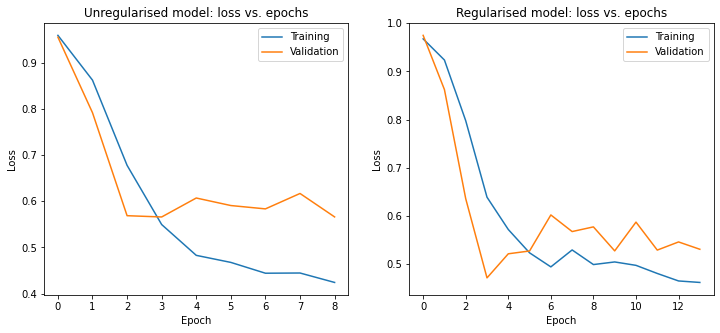

In [57]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()